## About Dataset
# Context
I was always fascinated by the food culture of Bengaluru. Restaurants from all over the world can be found here in Bengaluru. From United States to Japan, Russia to Antarctica, you get all type of cuisines here. Delivery, Dine-out, Pubs, Bars, Drinks,Buffet, Desserts you name it and Bengaluru has it. Bengaluru is best place for foodies. The number of restaurant are increasing day by day. Currently which stands at approximately 12,000 restaurants. With such an high number of restaurants. This industry hasn't been saturated yet. And new restaurants are opening every day. However it has become difficult for them to compete with already established restaurants. The key issues that continue to pose a challenge to them include high real estate costs, rising food costs, shortage of quality manpower, fragmented supply chain and over-licensing. This Zomato data aims at analysing demography of the location. Most importantly it will help new restaurants in deciding their theme, menus, cuisine, cost etc for a particular location. It also aims at finding similarity between neighborhoods of Bengaluru on the basis of food. The dataset also contains reviews for each of the restaurant which will help in finding overall rating for the place.

## Content
The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment
of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru
being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world.
With each day new restaurants opening the industry has’nt been saturated yet and the demand is increasing
day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with
established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of
the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves.
With such an overwhelming demand of restaurants it has therefore become important to study the demography
of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food.
If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are
mostly vegetarian. These kind of analysis can be done using the data, by studying the factors such as
• Location of the restaurant
• Approx Price of food
• Theme based restaurant or not
• Which locality of that city serves that cuisines with maximum number of restaurants
• The needs of people who are striving to get the best cuisine of the neighborhood
• Is a particular neighborhood famous for its own kind of food.

“Just so that you have a good meal the next time you step out”

The data is accurate to that available on the zomato website until 15 March 2019.
The data was scraped from Zomato in two phase. After going through the structure of the website I found that for each neighborhood there are 6-7 category of restaurants viz. Buffet, Cafes, Delivery, Desserts, Dine-out, Drinks & nightlife, Pubs and bars.

## Phase I,

In Phase I of extraction only the URL, name and address of the restaurant were extracted which were visible on the front page. The URl's for each of the restaurants on the zomato were recorded in the csv file so that later the data can be extracted individually for each restaurant. This made the extraction process easier and reduced the extra load on my machine. The data for each neighborhood and each category can be found here

#  Phase II,

In Phase II the recorded data for each restaurant and each category was read and data for each restaurant was scraped individually. 15 variables were scraped in this phase. For each of the neighborhood and for each category their online_order, book_table, rate, votes, phone, location, rest_type, dish_liked, cuisines, approx_cost(for two people), reviews_list, menu_item was extracted. See section 5 for more details about the variables

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

## EDA & Cleaning

In [2]:
data = pd.read_csv("zomato.csv")

In [3]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
data.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [5]:
# check the shape of data
data.shape

(51717, 17)

In [6]:
# get all information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
# check nullvalues in data
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
# drop unwanted columns from data
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [9]:
data.drop(['url', 'address','phone', 'location','reviews_list', 'menu_item',"dish_liked"],axis=1,inplace=True)

In [10]:
# this function clear and convert reating in to float number
def cleaning(values):
    if values == "NEW" or values == '-':
        return np.nan
    else:
        values = str(values).split("/")
        values = values[0]
        return float(values)
data["rate"] = data["rate"].apply(cleaning)
data["rate"] = data["rate"].fillna(np.nanmedian(data["rate"]))

In [11]:
# fill num value with mode because it is catigorical data
data["rest_type"] = data["rest_type"].fillna(st.mode(data["rest_type"]))
data["cuisines"] = data["cuisines"].fillna(st.mode(data["cuisines"]))

In [12]:
# replacing , with nospace after that convert in to float and fill nan values with median and convert in to intiger
data["approx_cost(for two people)"] = data["approx_cost(for two people)"].str.replace(",","")
data["approx_cost(for two people)"] = data["approx_cost(for two people)"].astype(float)
data["approx_cost(for two people)"] = data["approx_cost(for two people)"].fillna(np.nanmedian(data["approx_cost(for two people)"])).astype(int)

In [13]:
# now check with duplicet vaues 
data.duplicated().sum()

124

In [14]:
# so ve have 124 duplicet values we should drop this values 
data.drop_duplicates(inplace=True)

In [15]:
# saprate numerical features and catigorical features
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['name', 'online_order', 'book_table', 'rest_type', 'cuisines',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')
Index(['rate', 'votes', 'approx_cost(for two people)'], dtype='object')


In [16]:
# get all unique values from catigorical features
for i in catigorical_features:
    print(i,data[i].unique())
    print("="*80)

name ['Jalsa' 'Spice Elephant' 'San Churro Cafe' ... 'Nawabs Empire'
 'SeeYa Restaurant'
 'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...']
online_order ['Yes' 'No']
book_table ['Yes' 'No']
rest_type ['Casual Dining' 'Cafe, Casual Dining' 'Quick Bites' 'Casual Dining, Cafe'
 'Cafe' 'Quick Bites, Cafe' 'Cafe, Quick Bites' 'Delivery' 'Mess'
 'Dessert Parlor' 'Bakery, Dessert Parlor' 'Pub' 'Bakery'
 'Takeaway, Delivery' 'Fine Dining' 'Beverage Shop' 'Sweet Shop' 'Bar'
 'Beverage Shop, Quick Bites' 'Confectionery' 'Quick Bites, Beverage Shop'
 'Dessert Parlor, Sweet Shop' 'Bakery, Quick Bites'
 'Sweet Shop, Quick Bites' 'Kiosk' 'Food Truck'
 'Quick Bites, Dessert Parlor' 'Beverage Shop, Dessert Parlor' 'Takeaway'
 'Pub, Casual Dining' 'Casual Dining, Bar' 'Dessert Parlor, Beverage Shop'
 'Quick Bites, Bakery' 'Dessert Parlor, Quick Bites'
 'Microbrewery, Casual Dining' 'Lounge' 'Bar, Casual Dining' 'Food Court'
 'Cafe, Bakery' 'Dhaba' 'Quick Bites, Sweet Shop' 'Microbrewery'
 'Foo

In [17]:
# get all unique values from catigorical features
for i in catigorical_features:
    print(i,data[i].value_counts())
    print("="*80)

name name
Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Vivi's Food Joint                                           1
CHAATter Box                                                1
Bake Delite                                                 1
Mother's Rasoi Family Restaurant                            1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: count, Length: 8792, dtype: int64
online_order online_order
Yes    30347
No     21246
Name: count, dtype: int64
book_table book_table
No     45177
Yes     6416
Name: count, dtype: int64
rest_type rest_type
Quick Bites                   19321
Casual Dining                 10309
Cafe                    

In [18]:
# get 5 number summary from data 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rate,51593.0,3.700114,0.395454,1.8,3.5,3.7,3.9,4.9
votes,51593.0,283.371213,803.391827,0.0,7.0,41.0,198.0,16832.0
approx_cost(for two people),51593.0,554.224895,437.343961,40.0,300.0,400.0,650.0,6000.0


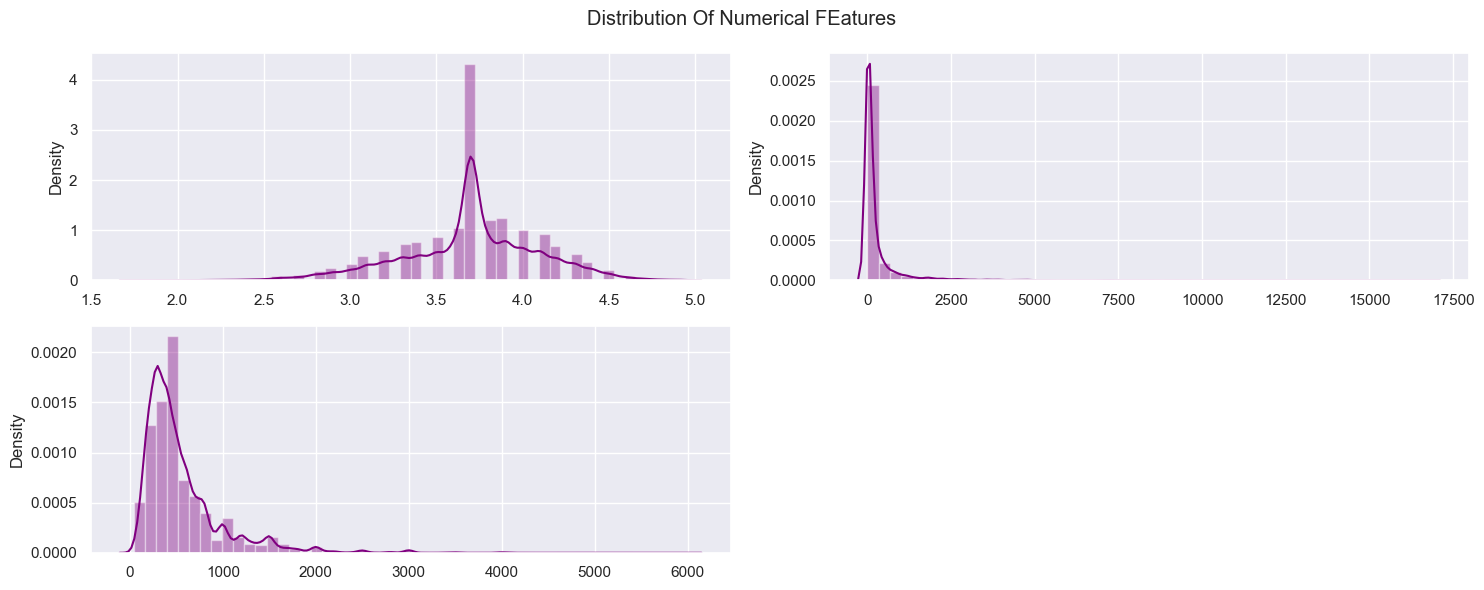

In [19]:
# check the distribution of data
try:
    plt.suptitle("Distribution Of Numerical FEatures")
    for i in range(len(numerical_features)):
        plt.subplot(2,2,i+1)
        sns.distplot(x=data[numerical_features[i]],color="purple")
        plt.tight_layout()
except Exception as e:
    print(e)  

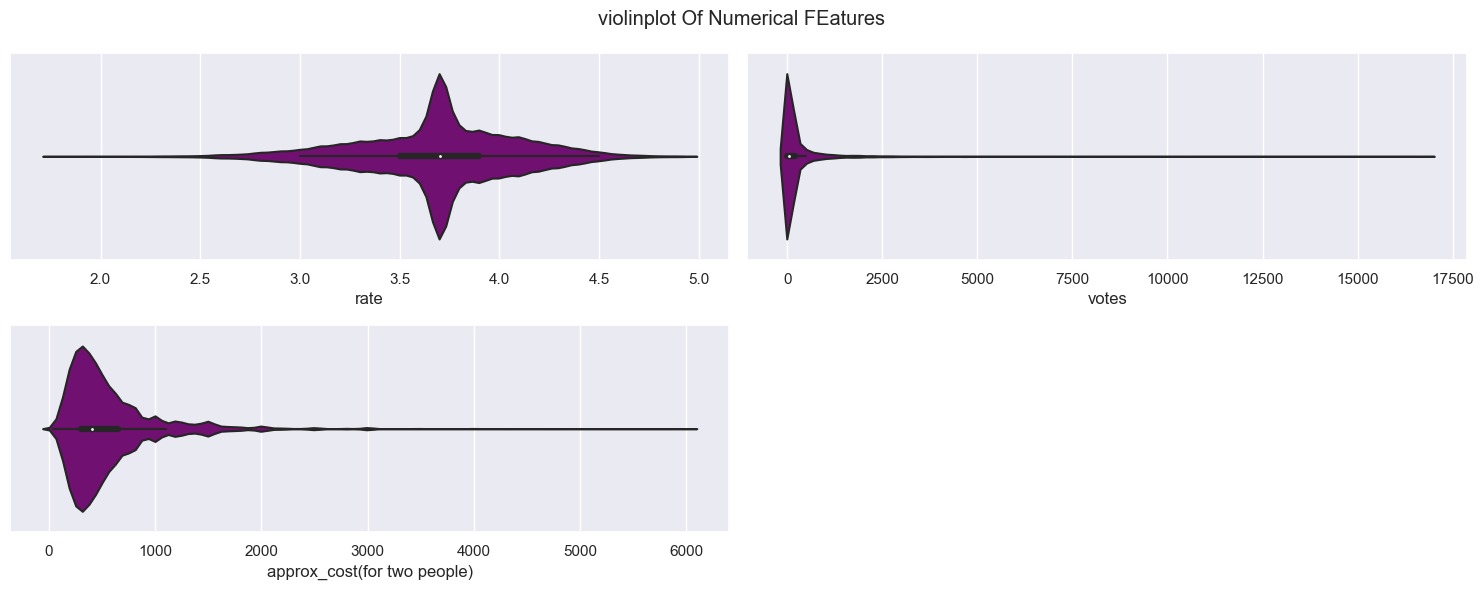

In [20]:
try:
    plt.suptitle("violinplot Of Numerical FEatures")
    for i in range(len(numerical_features)):
        plt.subplot(2,2,i+1)
        sns.violinplot(x=data[numerical_features[i]],color="purple")
        plt.tight_layout()
except Exception as e:
    print(e)  

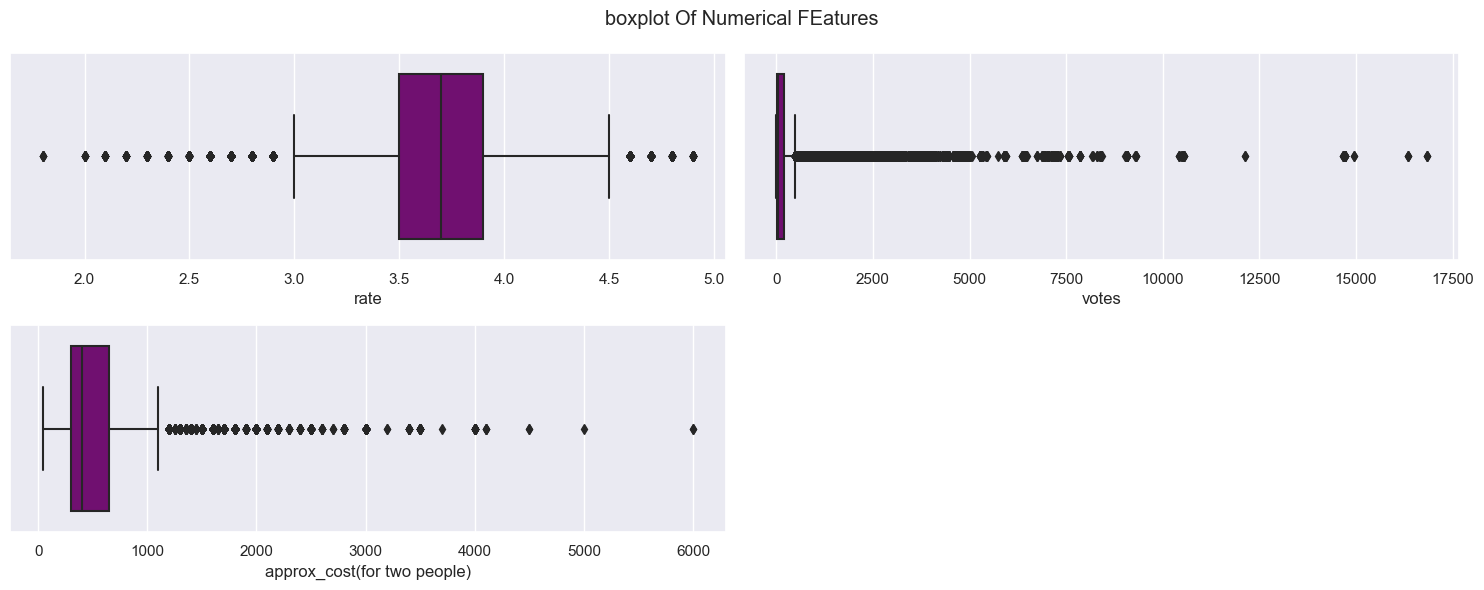

In [21]:
try:
    plt.suptitle("boxplot Of Numerical FEatures")
    for i in range(len(numerical_features)):
        plt.subplot(2,2,i+1)
        sns.boxplot(x=data[numerical_features[i]],color="purple")
        plt.tight_layout()
except Exception as e:
    print(e)  

<Axes: title={'center': 'Top 10 Highest rated Resturent In Banglore'}, xlabel='rate', ylabel='name'>

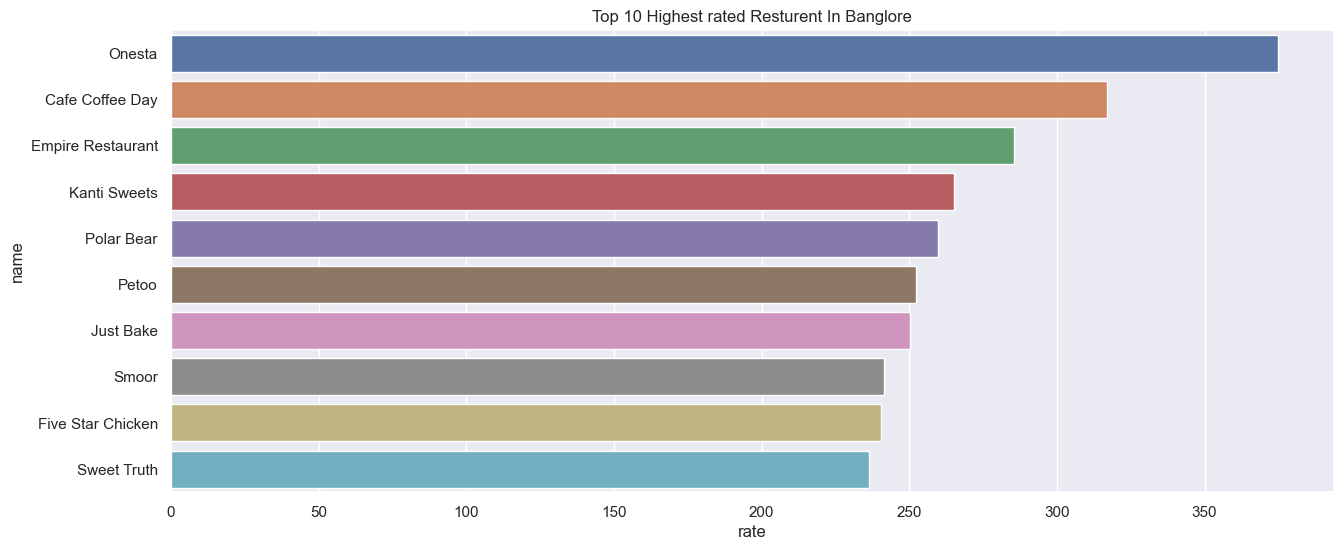

In [22]:
plt.title("Top 10 Highest rated Resturent In Banglore")
resturant = data.groupby("name")["rate"].sum().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x="rate",y="name",data=resturant)

<Axes: title={'center': 'Top 10 Highest rated Resturent In Banglore'}, xlabel='rate', ylabel='rest_type'>

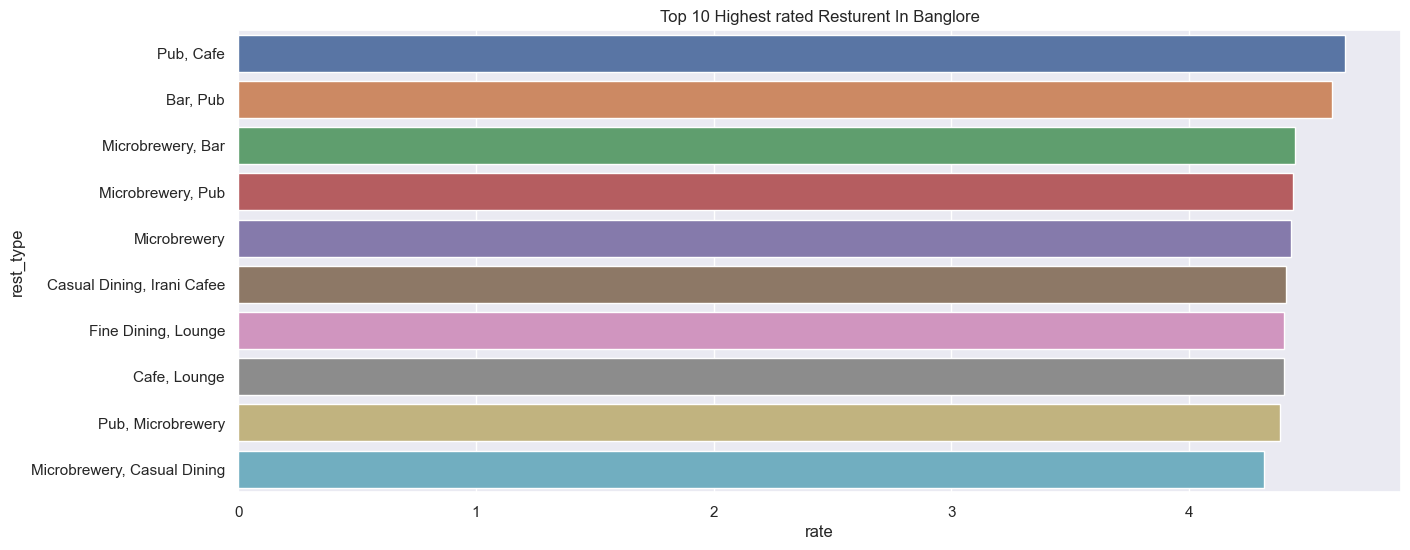

In [23]:
plt.title("Top 10 Highest rated Resturent In Banglore")
rest_type = data.groupby("rest_type")["rate"].mean().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x="rate",y="rest_type",data=rest_type)

<Axes: title={'center': 'Top 10 cuisines ratings'}, xlabel='rate', ylabel='cuisines'>

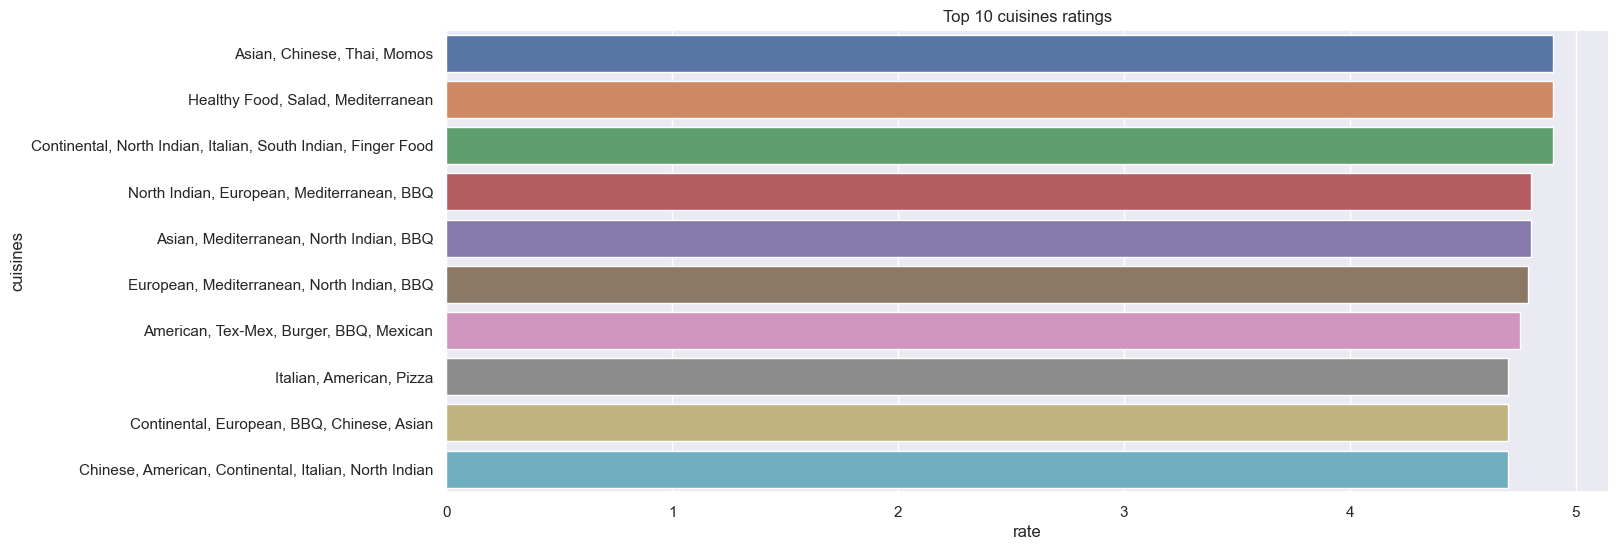

In [24]:
plt.title("Top 10 cuisines ratings")
cuisines = data.groupby("cuisines")["rate"].mean().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x="rate",y="cuisines",data=cuisines)

<Axes: title={'center': 'Top 10 cuisines ratings'}, xlabel='listed_in(type)', ylabel='rate'>

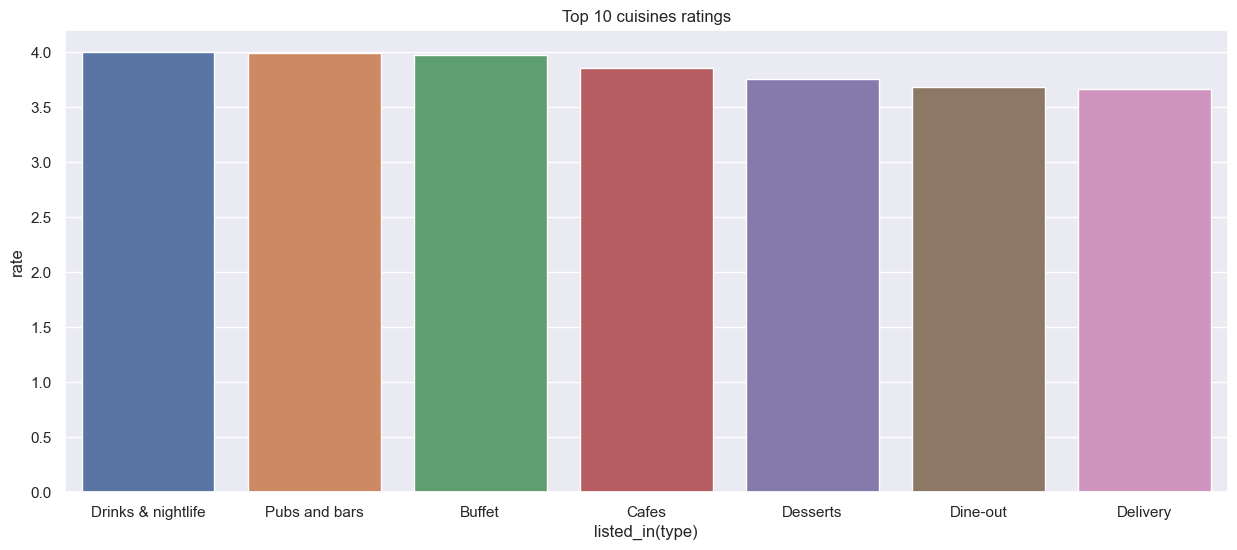

In [25]:
plt.title("Top 10 cuisines ratings")
listed_in = data.groupby("listed_in(type)")["rate"].mean().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x="listed_in(type)",y="rate",data=listed_in)

<Axes: ylabel='count'>

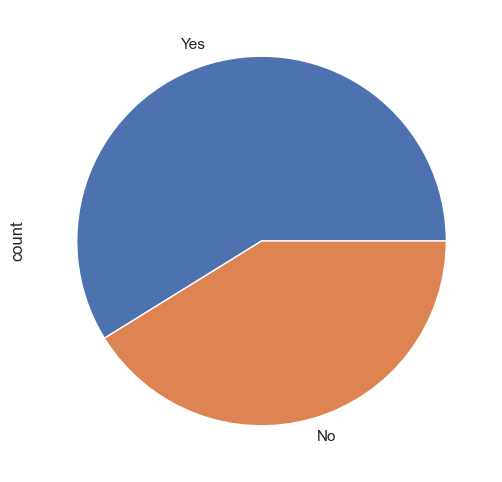

In [26]:
data["online_order"].value_counts().plot.pie()

<Axes: ylabel='count'>

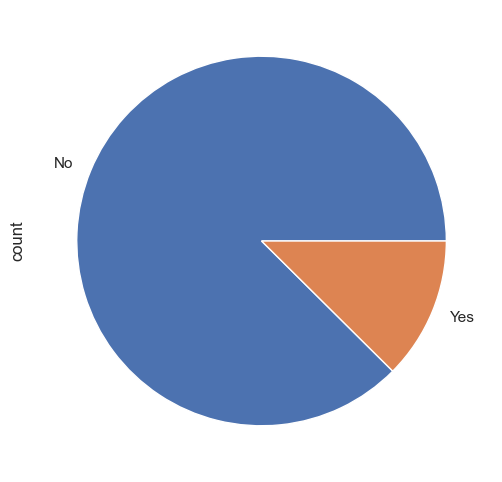

In [27]:
data["book_table"].value_counts().plot.pie()

In [28]:
data["approx_cost_for_two_people"] = data["approx_cost(for two people)"]
data["type_of_resturent"] = data["listed_in(type)"]
data["ratings"] = data["rate"]

In [29]:
data.drop(["approx_cost(for two people)","listed_in(type)","rate"],axis=1,inplace=True)

In [30]:
data["rest_type"].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [31]:
def collect(x):
    if x == "Cafe":
        return "Cafe's"
    elif x == "Casual Dining":
        return "Dining's"
    elif x == "Bar":
        return "Bar's"
    elif x== "Pub":
        return "Pub's"
    else:
        return "Other Resturents"
data["rest_type"] = data["rest_type"].apply(collect)

In [32]:
def cuisines(x):
    if x == "Indian" or x == "Mughlai" or x == "Rajasthani" or x == "Biryani":
        return "Indian Food"
    elif x == "Chinese":
        return "Chinese Food"
    elif x == "Mexican":
        return "Mexican Food"
    elif x == "Italian":
        return "Italian Food"
    else:
        return "Other Food"

In [33]:
data["cuisines"] = data["cuisines"].apply(cuisines)

In [34]:
from sklearn.preprocessing import LabelEncoder
lab = ["online_order","book_table"]
label = LabelEncoder()
for i in lab:
    label.fit(data[i])
    data[i] = label.fit_transform(data[i])

In [35]:
# drop name and location column from data 
data.drop(["name","listed_in(city)","rest_type","cuisines"],axis=1,inplace=True)

<Axes: >

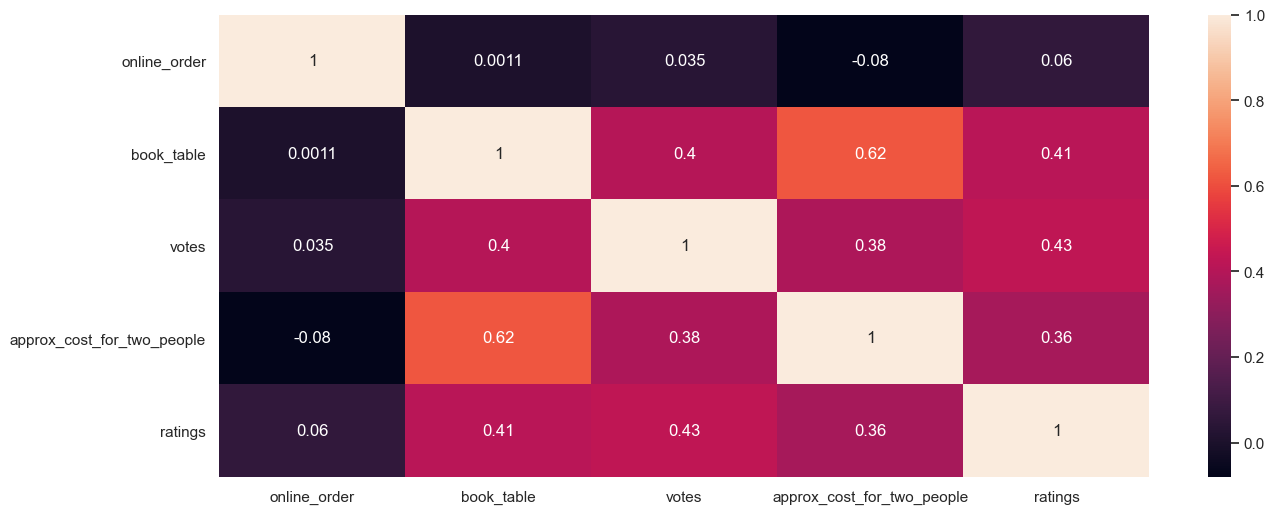

In [36]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

## Model Traning

In [37]:
data

,online_order,book_table,votes,approx_cost_for_two_people,type_of_resturent,ratings
0,1,1,775,800,Buffet,4.1
1,1,0,787,800,Buffet,4.1
2,1,0,918,800,Buffet,3.8
3,0,0,88,300,Buffet,3.7
4,0,0,166,600,Buffet,3.8
...,...,...,...,...,...,...
51712,0,0,27,1500,Pubs and bars,3.6
51713,0,0,0,600,Pubs and bars,3.7
51714,0,0,0,2000,Pubs and bars,3.7
51715,0,1,236,2500,Pubs and bars,4.3


In [38]:
data.shape

(51593, 6)

In [39]:
# saprate dependent and indipendent features
x = data.drop("ratings",axis=1)
y = data["ratings"]

In [40]:
# saprate numerical features and catigorical features
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['type_of_resturent'], dtype='object')
Index(['online_order', 'book_table', 'votes', 'approx_cost_for_two_people'], dtype='object')


In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [42]:
## Create Numeric Pipline
num_pipline = Pipeline(
        steps=[
            ("imputer",SimpleImputer(strategy="median")),
            ("scaler",StandardScaler())
        ]
)

# Catigorical Pipline
cato_pipline = Pipeline(
        steps=[
            ("imputer",SimpleImputer(strategy="most_frequent")),
            ("onehote",OneHotEncoder(sparse=False,handle_unknown="ignore")),
            ("scaler",StandardScaler())
        ]
)

# Create Preprocessor  object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [43]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(41274, 5)
(10319, 5)
(41274,)
(10319,)


In [45]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [76]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import  SVR
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [47]:
def model_evalution(test,predict):
    mse = f"MSE: {mean_squared_error(test,predict)}"
    mae = f"MAE: {mean_absolute_error(test,predict)}"
    rmse = f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}"
    r2score = f"R-squared: {r2_score(y_test, y_pred)}"
    return mse,mae,rmse,r2score

In [97]:
models = {
    "RandomForestRegressor":{
        "model":RandomForestRegressor(),
        "params":{
            'n_estimators': [200],
            }
        },
    "GradientBoostingRegressor":{
            "model":GradientBoostingRegressor(),
            "params":{
                "learning_rate":[0.1,0.01,0.001,],
                'n_estimators': [ 180, 200],
                'subsample':[0.1,0.01,1],
            
            }
        },
    "XGBRegressor":{
        "model":XGBRegressor(),
        "params":{
            'n_estimators': [ 180, 200],
            "learning_rate":[0.1,0.01,0.001],
        }
    },
    "KNeighborsRegressor":{
        "model":KNeighborsRegressor(n_neighbors=3,algorithm='kd_tree'),
        "params":{
            
        }
    }      
}

model_list = []
r2_list = []
y_predict_list = []
trainig_score = []

# Train and evaluate models using GridSearchCV
for model_name, model_params in models.items():
    model = model_params["model"]
    params = model_params["params"]
    randomcv = RandomizedSearchCV(model, params, cv=3)
    randomcv.fit(X_train, y_train)
    score = randomcv.score(X_train, y_train)
    y_pred = randomcv.predict(X_test)
    print(f"Model: {model_name}")
    print(f"Best Parameters: {randomcv.best_params_}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"R-squared: {r2_score(y_test, y_pred)}\n")
    
    r2_list.append(r2_score)
    y_predict_list.append(y_pred)
    trainig_score.append(score)

Model: RandomForestRegressor
Best Parameters: {'n_estimators': 200}
MAE: 0.1294125353564624
RMSE: 0.23255499499831497
R-squared: 0.6571028388964191

Model: GradientBoostingRegressor
Best Parameters: {'subsample': 0.1, 'n_estimators': 200, 'learning_rate': 0.1}
MAE: 0.18753703871633046
RMSE: 0.28665730054560673
R-squared: 0.4789989974416692

Model: XGBRegressor
Best Parameters: {'n_estimators': 200, 'learning_rate': 0.1}
MAE: 0.16865016157422166
RMSE: 0.2624661319041047
R-squared: 0.5632236777025071

Model: KNeighborsRegressor
Best Parameters: {}
MAE: 0.15545110960364386
RMSE: 0.27123731800422196
R-squared: 0.5335432003686604

